# Introduction to scikit-learn (sklearn)
    
This notebook demonstrates from of the most useful functions of the beautiful Scikit-Learn Library

What we're going to cover:

In [2]:

what_were_covering = [
"0. An end-to-end Scikit-Learn Workflow",
"1. Getting the data ready",
"2. Choose the right estimator(model, algorithm)",
"3. Fit the model/algorithm/estimator and use it to make predications on out data",
"4. Evaluating a model",
"5. Improve a model",
"6. Save and load a trained model",
"7. Putting it all together!"]

what_were_covering

['0. An end-to-end Scikit-Learn Workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator(model, algorithm)',
 '3. Fit the model/algorithm/estimator and use it to make predications on out data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together!']

In [3]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 0. An end-to-end Scikit-Learn workflow

# 1. Get the data ready

In [4]:
import pandas as pd
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease

import numpy as np

In [5]:
# Create X (features matrix)
X = heart_disease.drop("target", axis=1)

# Create Y (lables)
y = heart_disease["target"]

# 2. Choose the right model and hyperparameters (dials on a model to make better or worse)


In [6]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# We'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# 3. Fit the model to the training data


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# AKA model finding patterns in the data
# this splits our data from X and y to the above^ splits.
# 1. We fit the model to training data
# 2. Tehn evauluate it to see what its learn on test data
# 3. test_size=0.2 means 80% is used for training and 20% used for testings


In [8]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [9]:
y_preds = clf.predict(X_test)

In [10]:
y_test

6      1
61     1
1      1
217    0
0      1
      ..
200    0
103    1
275    0
78     1
187    0
Name: target, Length: 61, dtype: int64

# 4.Evaluate the model on the the training data and test data

In [11]:
clf.score(X_train, y_train) 

1.0

In [12]:
clf.score(X_test, y_test)

0.8032786885245902

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        31
           1       0.80      0.80      0.80        30

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [14]:
confusion_matrix(y_test, y_preds)

array([[25,  6],
       [ 6, 24]])

In [15]:
accuracy_score(y_test, y_preds)

0.8032786885245902

# 5. Improve a model

In [16]:
# Try different amount of n_estimators
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, y_test) * 100:.2f}%")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 80.33%

Trying model with 20 estimators...
Model accuracy on test set: 77.05%

Trying model with 30 estimators...
Model accuracy on test set: 75.41%

Trying model with 40 estimators...
Model accuracy on test set: 78.69%

Trying model with 50 estimators...
Model accuracy on test set: 81.97%

Trying model with 60 estimators...
Model accuracy on test set: 83.61%

Trying model with 70 estimators...
Model accuracy on test set: 81.97%

Trying model with 80 estimators...
Model accuracy on test set: 78.69%

Trying model with 90 estimators...
Model accuracy on test set: 85.25%



# 6. Save a model and load it 

In [17]:
import pickle

pickle.dump(clf, open("random_forst_model_1.pk1", "wb"))

In [18]:
loaded_model = pickle.load(open("random_forst_model_1.pk1", "rb"))
loaded_model.score(X_test, y_test)

0.8524590163934426

## Deeper Dive

## 1. Getting our data ready to be used with machine learning 

Three main things we have to do:
1. Split the data into features and labels (usually 'X' & 'y')

2. Filling ( also called imputing) or disregarding missing values

3. Converting non-numerical values to numerical values (also called feature encoding)
    

In [19]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
X = heart_disease.drop("target", axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [21]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [22]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [23]:
X_train.shape

(242, 13)

In [24]:
X_test.shape

(61, 13)

In [25]:
y_train.shape

(242,)

In [26]:
y_test.shape

(61,)

In [27]:
X.shape

(303, 13)

In [28]:
len(heart_disease)

303

### 1.1 Make sure its all numerical

In [29]:
car_sales =pd.read_csv("data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [30]:
len(car_sales)

1000

In [31]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [32]:
# Split into X(data) and y(target)
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

# Split into training and test sets
X_train, X_test, y_train, t_test = train_test_split(X, y, test_size=.20)



In [33]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [34]:
y.head()

0    15323
1    19943
2    28343
3    13434
4    14043
Name: Price, dtype: int64

In [35]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor

# Regressor predicts a number 

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

ValueError: could not convert string to float: 'Toyota'

In [ ]:
car_sales["Doors"].value_counts()

In [ ]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                                 remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

In [ ]:
pd.DataFrame(transformed_X)

In [ ]:
X.head()

<img src="images/one-hot-encoding-ex.png" />

In [ ]:
dummies = pd.get_dummies(car_sales[["Make","Colour","Doors"]])
dummies

In [ ]:
# Let's try refit the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

model.fit(X_train, y_train)


In [ ]:
model.score(X_test, y_test)

### 1.2 What if there were missing values?

1. Fill them with some value (also known as imputation)
2. Remove the samples with missing data 

In [ ]:
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing

In [ ]:
car_sales_missing.isna().sum()

### Option 1: Fill missing data with pandas


In [ ]:
# Fill in the "Make" Column
car_sales_missing["Make"].fillna("missing", inplace=True)

# Fill in the "Color" Column
car_sales_missing["Colour"].fillna("missing", inplace=True)

# Fill the "Odometer (KM)" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

# Fill the "Doors" column
car_sales_missing["Doors"].fillna(4, inplace=True)

# Check DataFrame again
car_sales_missing.isna().sum()



In [ ]:
# Remove rows with missing price value
car_sales_missing.dropna(inplace=True)
car_sales_missing.isna().sum()

In [ ]:
len(car_sales_missing)

In [ ]:
# Create X and Y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]


# Lets try and convert our data to numbers

# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                                 remainder="passthrough")
transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

## Option 2: Fill missing values with scikit learn

In [ ]:
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

In [ ]:
car_sales_missing.isna().sum()

In [ ]:
# Drop the rows with no labels
car_sales_missing.dropna(subset=["Price"], inplace=True)

In [ ]:
car_sales_missing.isna().sum()

In [ ]:
# Split into X and y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

# Split data into train and test
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                   test_size=0.2)

In [ ]:
# Check missing values
X.isna().sum()

In [ ]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' and numerical values with mean 

cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns

cat_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

# Create imputer ( something that fills missing data)

imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_features),
    ("num_imputer", num_imputer, num_features)
])

# Fill train and test values seperately 
filled_X_train = imputer.fit_transform(X_train)
filled_X_test = imputer.fit_transform(X_test)

# Check Filled X_train
filled_X_train

In [ ]:
# Get our transformed data arrays back into DataFrames
car_sales_filled_train = pd.DataFrame(filled_X_train,
                                     columns=["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled_test = pd.DataFrame(filled_X_test,
                                    columns=["Make", "Colour", "Doors", "Odometer (KM)"])

# Check missing data in training set
car_sales_filled_train.isna().sum()

In [ ]:
# Check the original 
car_sales_missing.isna().sum()

In [ ]:
car_sales_missing.dtypes

In [ ]:
# Now lets one hot encode the features with the same code as before
categorical_features = ["Make", "Colour", "Doors"]

one_hot = OneHotEncoder()

transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                                 remainder="passthrough")

# Fill train and test values seperately
transformed_X_train = transformer.fit_transform(car_sales_filled_train)

transformed_X_test = transformer.fit_transform(car_sales_filled_test)

# Cehck transdformed and filled X_train
transformed_X_train.toarray()

In [ ]:
# Now we've transformed X, lets see if we can fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

# Make sure to use transfored ( filled and one-hot encoded X data)
model.fit(transformed_X_train, y_train)
model.score(transformed_X_test, y_test)

In [ ]:
# Check length of transformed data (filled and one-hot encoded)
# vs. length of original data
len(transformed_X_train.toarray()) + len(transformed_X_test.toarray())


In [ ]:
len(car_sales)

#The 50 less rows in the transformed data is from the rows (50 total) dropped with missing values in the Price column

## 2. Choosing the right estimator/algorithm for our problem

Scikit-Learn uses estimator as another term for machine learning model or algorithm

Classification - predicting whether a sample is one thing or another 
Regression - predicting a number

## 2.1 Picking a machine learning model for a regression problem 

In [ ]:
# import Boston housing dataset
from sklearn.datasets import load_boston
boston = load_boston()
boston;
boston.keys()

In [ ]:
boston_df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])
boston_df

In [ ]:
# How many samples?
len(boston_df)

In [ ]:
# Lets try the Ridge Regression model
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# Create the data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2)
# Instantiate Ridge model
model = Ridge()
model.fit(X_train, y_train)

# Check the score of the Ridge model on test data
model.score(X_test, y_test)

In [ ]:
# How do we improve this score?
# What if Ridge wasnt working

In [ ]:
# Lets refer back to the map
# https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [ ]:
# Let's try the Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

# Create the data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

# Instantiate Random Forest model
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Evaluate the Random Forest Regressor
rf.score(X_test, y_test)

In [ ]:
# Check the Ridge model again
model.score(X_test, y_test)

## 2.2 Choosing an estimator for a classification problem

Let's go to the map
https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [ ]:
## Test before watching the video

In [ ]:
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease

In [ ]:
type(heart_disease)

In [ ]:
heart_disease.isna().sum()

In [ ]:
len(heart_disease)

In [ ]:
# Let's try Linear SVC Classification Model
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Create data X and y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Create train and test splits
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

# Instantiate Linear SVC Classification model
model = svm.LinearSVC()

# Fit model to data
model.fit(X_train,y_train)

# Score model
model.score(X_test, y_test)

In [ ]:
# Video example

In [ ]:
# Import the LinearSVC estimator class
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Make data X and y 
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

# Instantiate LinearSVC estimator
clf = LinearSVC()

# Fit the model to data
clf.fit(X_train, y_train)

# Score the model

clf.score(X_test, y_test)

Due to the score being less that 50% which is bad because its either 1 or 0 so it should be atleast 50 no matter what`

In [ ]:
# Try with a different model -> RandomForestClassifier

# Import
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make data X and y 
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

# Instantiate LinearSVC estimator
clf = RandomForestClassifier()

# Fit the model to data
clf.fit(X_train, y_train)

# Score the model

clf.score(X_test, y_test)

Tidbit: if you have structured data, use ensemble methods
        if you have unstructured data, use deep learning or transfered learning
    

# 3. Fit the model/algorithm/estimator and use it to make predications on out data

### 3.1 Fitting the model to the data

'X' -  features, feature, variables, data

'y' - labels, targets, target variables

In [ ]:
# Import
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make data X and y 
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

# Instantiate LinearSVC estimator
clf = RandomForestClassifier()

# Fit the model to data (training the machine learning model)
clf.fit(X_train, y_train)

# Evaluate the model (use the patterns the model has learned)

clf.score(X_test, y_test)

In [ ]:
X.head()

In [ ]:
y.head()

In [ ]:
y.tail()

# 3.2 Make predictions using a machine learning model

2 ways to make predictions

1. 'predict()'
2. 'predict_proba()'

In [ ]:
# Use a trained model to make predictions
clf.predict(np.array([1, 7, 8, 3, 4])) # this doesnt work

In [ ]:
X_test

In [ ]:
clf.predict(X_test)

In [ ]:
np.array([y_test])

In [ ]:
# Compare predictions to truth labels to evaluate the model
# We care comparing how well the model did
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

In [ ]:
clf.score(X_test, y_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

In [ ]:
# Above are three diff ways of doing the same thing

Make predictions with predict_proba()

In [ ]:
# predict_proba() returns probabilities of a classification lable

In [ ]:
clf.predict_proba(X_test[:5])

In [ ]:
# Let's predict on the same data
clf.predict(X_test[:5])

In [ ]:
heart_disease["target"].value_counts()

In [ ]:
boston_df.head()

Using regression model to predict the housing cost from the boston data set

In [ ]:
# Test

# import machine learning model
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                   test_size=0.2)

# instantiate Random Forest Regression Model and Fit
model = RandomForestRegressor().fit(X_train, y_train)

# Make Predictions
y_preds = model.predict(X_test)
y_preds[:10]
# Values from predictions

'predict()' can also be used for regression models

In [ ]:
# Values from actual test
np.array(y_test[:10])

In [ ]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

# 4. Evaluating a machine learning model

Three ways to evaluate Scikit-Learn models/estimators

1. Estimator 'score' method
2. The 'scoring' parameter
3. Problem specific metric functions

4.1 Evaluating a method with the score method

In [ ]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                   test_size=0.2)

model = RandomForestClassifier()

model.fit(X_train, y_train)

In [ ]:
# Classification (score): returns the mean accuracy

In [ ]:
model.score(X_test, y_test)

Let's do the same for Regression


In [ ]:
# import machine learning model
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                   test_size=0.2)

# instantiate Random Forest Regression Model and Fit
model = RandomForestRegressor().fit(X_train, y_train)

In [ ]:
# Regression (score): returns the coefficient of determination

In [ ]:
model.score(X_test, y_test)

# 4.2 Evaluating a model using the scoring parameter

In [ ]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                   test_size=0.2)

model = RandomForestClassifier()

model.fit(X_train, y_train);


In [ ]:
model.score(X_test, y_test)

In [ ]:
cross_val_score(model, X, y, cv=5)

<img src="images/cross-validation-ex.png"/>

In [ ]:
np.random.seed(42)

#single training and test split score

model_single_score = model.score(X_test, y_test)

# Take the mean of 5 fold cross validation score
model_cross_val_score = np.mean(cross_val_score(model, X, y, cv=5))

# Compare the two
model_single_score, model_cross_val_score


In [ ]:
# Default scoring parameter of classifier - mean accuracy

In [ ]:
# Scoring parameter set to None by default
cross_val_score(model, X, y, cv=5, scoring=None)

# 4.2 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion Matrix
4. Classification Report

# 1.Accuracy

In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()

cross_val_score = cross_val_score(clf, X, y, cv=5)

In [38]:
np.mean(cross_val_score)

0.8248087431693989

In [42]:
print(f"Heart Disease Classifier Cross Validated Accuracy: {np.mean(cross_val_score) *100:.2f}%")

Heart Disease Classifier Cross Validated Accuracy: 82.48%


*Given a random sample (info the model hasnt seen before) how likely is it to predict the right label?

# 2. Area under ROC curve

* RECEIVER OPERATING CHARACTER (AUC/ROC)

* ROC CURVE are a comparison of a models true positive rate (TPR) vs a models false positive rate (FPR)

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0

* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [45]:
# Create X_test...etc
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [48]:
from sklearn.metrics import roc_curve

# Fit the classifier
clf.fit(X_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10], len(y_probs)

(array([[0.58, 0.42],
        [0.16, 0.84],
        [0.49, 0.51],
        [0.78, 0.22],
        [0.55, 0.45],
        [0.1 , 0.9 ],
        [0.29, 0.71],
        [0.98, 0.02],
        [0.1 , 0.9 ],
        [0.46, 0.54]]),
 61)

In [49]:
y_probs_pos = y_probs[:,1]
y_probs_pos[:10]

array([0.42, 0.84, 0.51, 0.22, 0.45, 0.9 , 0.71, 0.02, 0.9 , 0.54])

In [50]:
# Calculate TPR, FPR, and thresholds

fpr, tpr, thresholds = roc_curve(y_test, y_probs_pos)

# Check the False positive rates (FPR)
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.06896552,
       0.06896552, 0.13793103, 0.13793103, 0.17241379, 0.17241379,
       0.20689655, 0.24137931, 0.24137931, 0.27586207, 0.34482759,
       0.34482759, 0.37931034, 0.4137931 , 0.44827586, 0.51724138,
       0.51724138, 0.55172414, 0.5862069 , 0.65517241, 0.72413793,
       0.79310345, 1.        ])

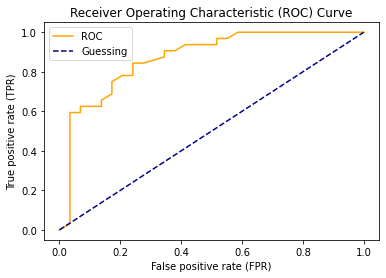

In [51]:
# Create a function for plotting ROC curve
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the FPR (false positive rate) and TPR (true positive rate) of a model
    """
    # Plot ROC curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    
    # Plot line wth no predictive power (baseline)
    plt.plot([0,1], [0,1], color="darkblue", linestyle='--', label="Guessing")
    
    # Customize the plot
    plt.xlabel("False positive rate (FPR)")
    plt.ylabel("True positive rate (TPR)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr,tpr)
    

In [53]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_pos)

0.8701508620689655

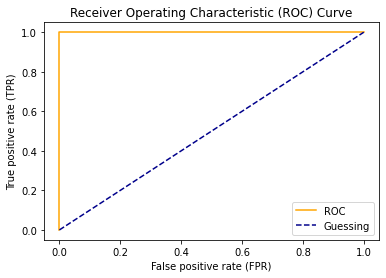

In [54]:
# Plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr,tpr)

In [55]:
# Perfect AUC score
roc_auc_score(y_test, y_test)

1.0

# 3. Confusion Matrix

A confusion matrix is a quick way to compare the labels a model predicts and the acrtual labels it was supposed to predict.

In essence, giving you an idea where the model is getting confused

In [56]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)


confusion_matrix(y_test, y_preds)



array([[22,  7],
       [ 5, 27]])

In [57]:
# Visualize confusion matrix with pd.crosstab()

pd.crosstab(y_test, y_preds, rownames=["Actual Labels"], colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,22,7
1,5,27


In [58]:
22 + 7 + 5 +27, len(y_preds)

(61, 61)

<img src="images/confusion-matrix-ex.png"/>